<a href="https://colab.research.google.com/github/ldlb10-cs/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.1 ODE Initial Value Problem Statement

*   An initial value problem in ordinary differential equations specifies a differential equation together with an initial condition for the unknown function. The given derivative relationship and the initial condition uniquely determine the solution over a certain interval.

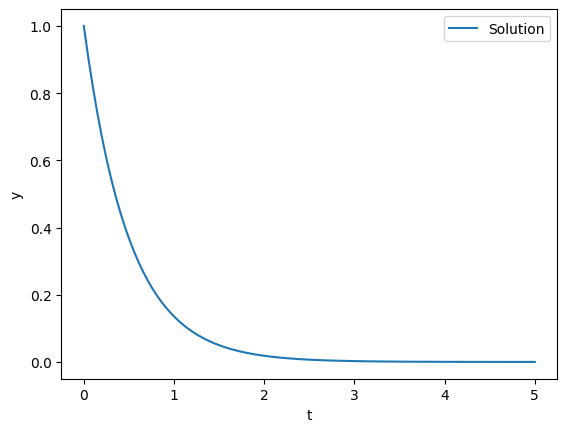

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_func(t,y):
    return -2*y

t_span=(0,5)
y0=[1.0]
sol=solve_ivp(ode_func,t_span,y0,dense_output=True)
t_vals=np.linspace(t_span[0],t_span[1],100)
y_vals=sol.sol(t_vals)[0]

plt.plot(t_vals,y_vals,label="Solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

22.2 Reduction of Order

*   Reduction of order is a technique used for higher-order linear differential equations. When one solution of a second-order linear ODE is known, an auxiliary function is introduced to generate another independent solution, reducing the overall problem to a simpler first-order equation in terms of that auxiliary function.

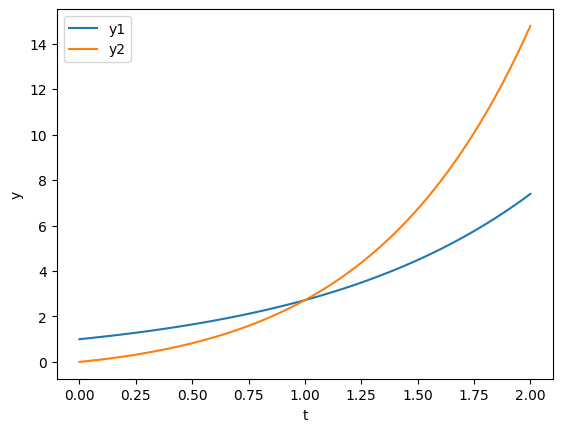

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def known_solution(t):
    return np.exp(t)

def second_solution(t_vals):
    s=[]
    for t in t_vals:
        s.append(t*known_solution(t))
    return np.array(s)

t_vals=np.linspace(0,2,100)
y1=known_solution(t_vals)
y2=second_solution(t_vals)

plt.plot(t_vals,y1,label="y1")
plt.plot(t_vals,y2,label="y2")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

22.3 The Euler Method

*   Euler's method is a basic numerical approach for solving initial value problems. Starting from an initial condition, it uses a constant step size and updates the approximate solution by adding the product of the step size and the current derivative.

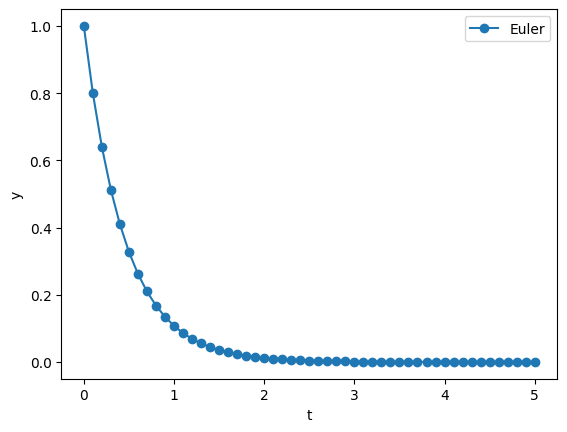

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,y):
    return -2*y

def euler_method(f,t0,y0,h,n_steps):
    t_vals=[t0]
    y_vals=[y0]
    for i in range(n_steps):
        y_next=y_vals[-1]+h*f(t_vals[-1],y_vals[-1])
        t_next=t_vals[-1]+h
        t_vals.append(t_next)
        y_vals.append(y_next)
    return np.array(t_vals),np.array(y_vals)

t0=0
y0=1
h=0.1
n_steps=50
t_vals,y_vals=euler_method(f,t0,y0,h,n_steps)

plt.plot(t_vals,y_vals,marker='o',label="Euler")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()